### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://corners.gmarket.co.kr/bestsellers'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [5]:
dom = BeautifulSoup(response.text, 'html.parser')

In [10]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div > ul > li')
len(elements)

#gBestWrap > div > div:nth-child(5) > div > ul > li

200

In [13]:
element = elements[0]

In [22]:
data = {
    'title' : element.select_one('.itemname').text,
    'link' : element.select_one('.itemname').get('href'),
    'img' : 'http:' +element.select_one('img').get('data-original'),
    'o_price' : element.select_one('.o-price').text,
    's_price' : element.select_one('.s-price').text.strip().split('\n')[0],
}
data

{'title': '[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2628342593&ver=638122426423101645',
 'img': 'http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714',
 'o_price': '정가33,800원',
 's_price': '할인가23,700원'}

In [25]:
data = []
for element in elements:
    data.append({
        'title' : element.select_one('.itemname').text,
        'link' : element.select_one('.itemname').get('href'),
        'img' : 'http:' +element.select_one('img').get('data-original'),
        'o_price' : element.select_one('.o-price').text,
        's_price' : element.select_one('.s-price').text.strip().split('\n')[0],
    })
df = pd.DataFrame(data)
df.tail(2)

,title,link,img,o_price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"정가43,000원","할인가12,900원"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"정가96,000원","할인가80,000원"


In [28]:
df[20:40]

,title,link,img,o_price,s_price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,,"할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,,"할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,,"할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"
25,[닥터지]닥터지 블랙 스네일 달팽이크림 50ml 1+1_A005956,http://item.gmarket.co.kr/Item?goodscode=27324...,http://gdimg.gmarket.co.kr/2732477762/still/30...,"정가26,300원","할인가24,200원"
26,[오뚜기]오뚜기 가벼운참치 라이트스탠다드 135GX12개,http://item.gmarket.co.kr/Item?goodscode=25534...,http://gdimg.gmarket.co.kr/2553487898/still/30...,"정가29,900원","할인가27,900원"
27,아침이슬사과 22년 햇 부사 가정용 중대과 4.5kg(22과내),http://item.gmarket.co.kr/Item?goodscode=26129...,http://gdimg.gmarket.co.kr/2612939665/still/30...,"정가15,470원","할인가10,900원"
28,쌈빡김치 국내산 100% 전라도 파김치 1kg,http://item.gmarket.co.kr/Item?goodscode=27851...,http://gdimg.gmarket.co.kr/2785125457/still/30...,"정가15,000원","할인가10,000원"
29,[풀무원]로스팅짜장 라면 4봉(파기름2봉+고추기름2봉),http://item.gmarket.co.kr/Item?goodscode=23756...,http://gdimg.gmarket.co.kr/2375673537/still/30...,"정가10,000원","할인가9,400원"


In [36]:
# update : 데이터 선택 = 수정할데이터
idx = df[df['o_price'] == ''].index
# df['s_price'].loc[idx]
df['o_price'].loc[idx] = df['s_price'].loc[idx]
df[20:40].head()

,title,link,img,o_price,s_price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,"할인가199,000원","할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,"할인가7,900원","할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,"할인가11,800원","할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"


In [ ]:
# regex : 정규표현식
# 문자열 데이터를 특정 패턴으로 처리할 때

In [42]:
import re
price = '할인가11,800원'
re.findall('[0-9,]+', price)[0]

'11,800'

In [43]:
df['o_price'] = df['o_price'].apply(lambda price: re.findall('[0-9,]+',price)[0])
df['s_price'] = df['s_price'].apply(lambda price: re.findall('[0-9,]+',price)[0])
df.tail(2)

,title,link,img,o_price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"96,000","80,000"


In [44]:
txt = '저의 이메일 주소는 chjy1819@gmail.com과 chjy1819@naver.com입니다.'
re.findall('[a-zA-Z0-9.]+@[a-z]+\.[a-z]+', txt)

['chjy1819@gmail.com', 'chjy1819@naver.com']

#### 4. download image

In [45]:
df

,title,link,img,o_price,s_price
0,[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음,http://item.gmarket.co.kr/Item?goodscode=26283...,http://gdimg.gmarket.co.kr/2628342593/still/30...,"33,800","23,700"
1,[피셔프라이스]피셔프라이스 러닝 푸드트럭,http://item.gmarket.co.kr/Item?goodscode=19985...,http://gdimg.gmarket.co.kr/1998535842/still/30...,"210,000","99,000"
2,[나이키키즈](대구신세계)[나이키키즈] (105~170) 조던 썸머 상/하의세트 세일가,http://item.gmarket.co.kr/Item?goodscode=27728...,http://gdimg.gmarket.co.kr/2772877848/still/30...,"58,000","45,820"
3,(지오지아)사계절 테이퍼드/와이드핏 슬랙스 치노팬츠 10종 택1,http://item.gmarket.co.kr/Item?goodscode=27678...,http://gdimg.gmarket.co.kr/2767818438/still/30...,"32,000","24,640"
4,[플랙]남성 데님 팬츠 6종 택1(PJTT5MLD731외5종),http://item.gmarket.co.kr/Item?goodscode=27808...,http://gdimg.gmarket.co.kr/2780877061/still/30...,"69,000","50,370"
...,...,...,...,...,...
195,(깨비농원) 한라봉 4kg 가정용(크기랜덤),http://item.gmarket.co.kr/Item?goodscode=27748...,http://gdimg.gmarket.co.kr/2774808274/still/30...,"25,870","18,900"
196,[압타밀]압타밀 프로푸트라 1단계 800g 4통 세트 독일내수용 / 빠른배송 / 최신제품,http://item.gmarket.co.kr/Item?goodscode=27748...,http://gdimg.gmarket.co.kr/2774807080/still/30...,"149,800","143,060"
197,2세대 코코맘 이동식트롤리 기저귀정리함 3단 캡형,http://item.gmarket.co.kr/Item?goodscode=27623...,http://gdimg.gmarket.co.kr/2762398385/still/30...,"51,900","44,900"
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"


In [49]:
import os
dir_name = 'data'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

In [50]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54BB-5177

 C:\Users\User\웹크롤링\day2 디렉터리

2023-02-17  오후 03:48    <DIR>          .
2023-02-17  오후 03:48    <DIR>          ..
2023-02-17  오후 02:54    <DIR>          .ipynb_checkpoints
2023-02-17  오후 01:40            19,195 01_html.ipynb
2023-02-17  오후 02:10            12,683 02_css_selector.ipynb
2023-02-17  오후 02:51             9,640 03_naver_relational_keywords.ipynb
2023-02-17  오후 03:48            41,712 04_gmarket.ipynb
2023-02-13  오후 05:30             2,427 05_selenium.ipynb
2023-02-17  오후 03:48    <DIR>          data
               5개 파일              85,657 바이트
               4개 디렉터리  147,498,606,592 바이트 남음


In [51]:
img_link = df.loc[0, 'img']
print(img_link)

http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714


In [52]:
response = requests.get(img_link)
response

<Response [200]>

In [53]:
response.text

'����\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00��\x00HPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x0f\x1c\x01Z\x00\x03\x1b%G\x1c\x02\x00\x00\x02\x00\x02\x008BIM\x04%\x00\x00\x00\x00\x00\x10��\x1f�ȷ�x/4b4\x07Xw���\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00��\x03�http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\ufeff" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 7.1-c000 79.dabacbb, 2021/04/14-00:39:44        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmpMM:OriginalDocumentID="BF0887C7F4A5F7A85C3813F610EAA930" xmpMM:DocumentID="xmp.did:12FAFD9DABFF11EDB3A18515048A3C38" xmpMM:InstanceID="xmp.iid:12FAFD9CABFF11EDB3A18515048A3C38" xmp:CreatorTool="Adobe Photoshop CC 2017 (Windows)"> <xmpMM:Derive

In [54]:
with open('data/test.png', 'wb') as file:
    file.write(response.content)

In [55]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54BB-5177

 C:\Users\User\웹크롤링\day2\data 디렉터리

2023-02-17  오후 03:53    <DIR>          .
2023-02-17  오후 03:53    <DIR>          ..
2023-02-17  오후 03:53            33,866 test.png
               1개 파일              33,866 바이트
               2개 디렉터리  147,500,212,224 바이트 남음


In [56]:
# pillow: 파이썬에서 이미지 전처리를 하는 패키지
from PIL import Image as pil

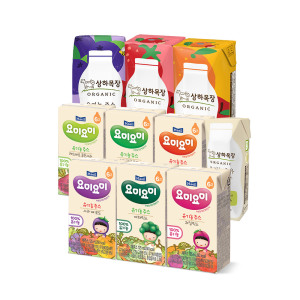

In [57]:
pil.open('data/test.png')

In [63]:
for idx, data in df[:5].iterrows():
    print(idx, data['img'])
    filename = '0' * (2 - len(str(idx))) + str(idx)
    filename = f'data/{idx}.png'
    print(idx, data['img'], filename)
    response = requests.get(data['img'])
    with open('data/{}.png', 'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714
0 http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714 data/0.png
1 http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021714
1 http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021714 data/1.png
2 http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021714
2 http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021714 data/2.png
3 http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021714
3 http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021714 data/3.png
4 http://gdimg.gmarket.co.kr/2780877061/still/300?ver=2023021714
4 http://gdimg.gmarket.co.kr/2780877061/still/300?ver=2023021714 data/4.png


In [64]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54BB-5177

 C:\Users\User\웹크롤링\day2\data 디렉터리

2023-02-17  오후 03:59    <DIR>          .
2023-02-17  오후 03:59    <DIR>          ..
2023-02-17  오후 04:02             5,481 {}.png
2023-02-17  오후 03:53            33,866 test.png
               2개 파일              39,347 바이트
               2개 디렉터리  147,495,817,216 바이트 남음
